In [10]:
%matplotlib inline

import numpy as np

from matplotlib.pyplot import figure
from scipy import signal
from matplotlib.gridspec import GridSpec
from analysis.plots.utils import get_colors

In [11]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [85]:
bins = 200
space_min = -1
space_max = 1

def get_empty_space():
    v_x = np.linspace(space_min, space_max, bins)
    v_y = np.zeros(bins)
    return np.array([[x, y] for x, y in zip(v_x, v_y)])

gauss_bins = 101
pos_std = 0.15
gauss_std = pos_std / ((space_max - space_min)/bins)

v_mean = 0
b_mean_left = -0.15
b_mean_right = b_mean_left + 0.3

# ----- visual input -------
v_win = get_empty_space()
idx = int(np.abs(v_win[:, 0] - v_mean).argmin() - (gauss_bins - 1)/2)
v_win[idx:idx + gauss_bins, 1] = signal.gaussian(gauss_bins, std=gauss_std)

# ----- boundary input in A -------
b_left_win = get_empty_space()
idx = int(np.abs(b_left_win[:, 0] - b_mean_left).argmin() - (gauss_bins - 1)/2)
b_left_win[idx:idx + gauss_bins, 1] = signal.gaussian(gauss_bins, std=gauss_std)/2

# ----- boundary input in B -------
b_right_win = get_empty_space()
idx = int(np.abs(b_right_win[:, 0] - b_mean_right).argmin() - (gauss_bins - 1)/2)
b_right_win[idx:idx + gauss_bins, 1] = signal.gaussian(gauss_bins, std=gauss_std/2)

# ----- SUM of boundary inputs
x_f = b_left_win[:, 0]
y_f = b_left_win[:, 1] + b_right_win[:, 1]
f_win = np.array([[x, y] for x, y in zip(x_f, y_f)])

# ----- Convolution ---------
c_x = b_left_win[:, 0]
c_y = np.convolve(b_left_win[:, 1], b_right_win[:, 1], mode='same')
c_y = np.multiply(b_left_win[:, 1], b_right_win[:, 1])
f_cvd = np.array([[x, y] for x, y in zip(c_x, c_y*10)])

conv_mean_x = f_cvd[np.abs(f_cvd[:, 1] - f_cvd[:, 1].max()).argmin()][0]

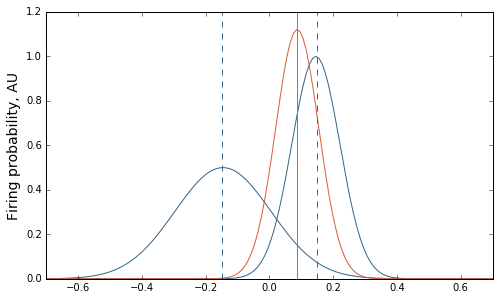

In [87]:
# ----- FIGURE ----------
fig = figure(figsize=(8, 10))

COLORS = get_colors()
gs = GridSpec(4, 1)
lim_left = -0.7
lim_right = 0.7

ax = fig.add_subplot(gs[:2, :])
#ax.plot(v_win[:, 0], v_win[:, 1], color=COLORS['d'], label='Visual input')
ax.plot(b_left_win[:, 0], b_left_win[:, 1], color=COLORS['a'], label='Boundary input in A')
ax.plot(b_right_win[:, 0], b_right_win[:, 1], color=COLORS['a'], label='Boundary input in B')
ax.plot(f_cvd[:, 0], f_cvd[:, 1], color=COLORS['b'], label='Boundary input in B')
ax.axvline(conv_mean_x, color=COLORS['b'])
ax.axvline(b_mean_left, color=COLORS['a'], linestyle='dashed')
ax.axvline(b_mean_right, color=COLORS['a'], linestyle='dashed')
ax.set_xlim(lim_left, lim_right)
#ax.set_ylim(0, 1.5)
ax.set_ylabel('Firing probability, AU', fontsize=14)
#ax.set_title('Maximum cumulative activity when boundary spanned symmetrically rel. to visual inputs', fontsize=18)
#ax.legend(loc='upper right')
#ax.text(lim_left + 0.05, 1.3, 'std = %.2f m' % pos_std, fontsize=14)